# Florida Weather Analysis
This is a report on the historical analysis of weather patterns in an area that approximately overlaps the area of the state of Florida.
The data we will use here comes from NOAA.
We focused on six measurements:
- **TMIN, TMAX:** the daily minimum and maximum temperature.
- **TOBS:** The average temperature for each day.
- **PRCP:** Daily Percipitation (in mm)
- **SNOW:** Daily snowfall (in mm)
- **SNWD:** The depth of accumulated snow.


## Sanity-check: comparison with outside sources

<p>We start by comparing some of the general statistics with graphs that we obtained from a site called <a href="http://www.usclimatedata.com/climate/boston/massachusetts/united-states/usma0046" target="_blank">US Climate Data</a> The graph below shows the daily minimum and maximum temperatures for each month, as well as the total precipitation for each month. Note that we take Tampa, a City of Florida, as the data source. Some of the stations in provided data are located in this city.</p>

<p>&nbsp;</p>

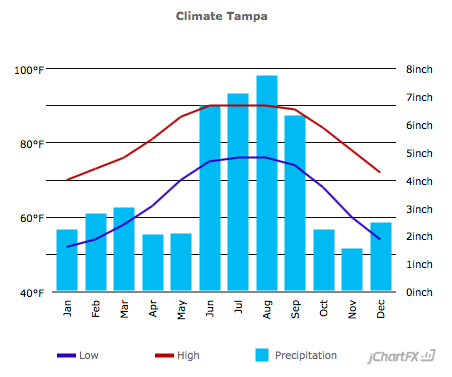

<p>&nbsp;</p>

<p>We see that the min and max daily&nbsp;temperature agree with the ones we got from our data, once we translate Fahrenheit to Centigrade.</p>

<p>&nbsp;</p>

<p><img alt="TMIN,TMAX.png" src="Figures/TMAX-TMIN.png" style="height:300px; width:800px" /></p>

<p>To compare the precipitation&nbsp;we need to translate millimeter/day to inches/month. According to our analysis the average rainfall is 3.00 mm/day which translates to about 3.55 Inches&nbsp;per month. According to US-Climate-Data the average rainfall is closer to 4 inch per month. However, there is clear agreement that average precipitation&nbsp;is close to a constant throughout the year</p>

<p>&nbsp;<img alt="PRCP.png" src="Figures/PRCP.png" style="height:360px; width:480px" /></p>

<p>We also caculate the monthly average of temperature and percipitation from out data to compare with the data in US Climate Data.</p>

<p>&nbsp;</p>

Month Average TMIN, TMAX and PRCP        |       Florida Climate Graph from US Climate Data
:------------------------------------------------:|:----------------------------------------------------:
<img src="Figures/moth_average.png" width="425"/> | <img src="FIgures/us_climate_data2.png" width="425"/> 

<p>&nbsp;</p>

<p>The temparture range is almost the same when we translate Fahrenheit to Centigrade. There is just a little difference in percipitation. The percipitation gained from our data is a little bit less than the one got in US Climate data, especially in summer, from June to September.</p>

<p>There is also information about the average temperature for each day.</p>

<p>&nbsp;<img alt="TOBS.png" src="Figures/TOBS.png" style="height:360px; width:480px" /></p>

Although Florida rarely snows, we can still find few days with SNOW and SNWD data.

<p>&nbsp;<img alt="TOBS.png" src="Figures/SNOW-SNWD.png" style="height:300px; width:800px" /></p>

From all the data, we can see only very few days snowed. The amount of SNOW and SNWD is also very small. The daily snowfall maximum is only 0.0119271445358 mm and the depth of accumulated snow maximum is only 0.0253117206983 mm. What's more, I think there are some noises in data. As you can see, the day before the day have accumulated snow usually did not snow!

## PCA analysis

For each of the six measurement, we compute the percentate of the variance explained as a function of the number of eigen-vectors used.

### Percentage of variance explained

<p>&nbsp;</p>

![VarExplained1.png](Figures/pca_any1.png)

We see that the top 5 eigen-vectors explain 34% of variance for TMIN, 52% for TOBS and 26% for TMAX.

We conclude that of the three, TOBS is best explained by the top 5 eigenvectors. This is especially true for the first eigen-vector which, by itself, explains 43% of the variance.

![VarExplained2.png](Figures/pca_any2.png)

The top 5 eigenvectors explain 8% of the variance for PRCP. On the other hand, the top 5 eigenvectors can explain almost %100 of the variance for SNWD and SNOW. This means that these top 5 eigenvectors capture almost all of the variation in the snow signals. It makes sense as Florida rarely snows. We can see it from the previous images.


## Analysis of Snow Depth

In this part, we will analyze the depth of the snow (SNWD) data. This part is required as shown in the sample report. However, as there are few days snowed before, so only 5 eigenvectors can cover almost all the information. So we graph the mean and the top 5 eigen-vector. (Actually the first two eigenvectors can almost cover all the variance.)

We observe that the snow days vary from begin of the January to begin of the May. The SNWD are all very small. 

![snwd_mean_eigs.png](Figures/snwd-mean-eig.png)

Next we interpret the eigen-functions. However, As there are only few days snowed before, so the eigenvector gained from PCA can be interpreted as the vector only has specific value on certain days and the mean of SNWD of these days. As most of the years do not have any snow, so we need to delete them (The redsidual mean of these values are too close to 0). There there are only 5 station-year data left for analysis. (PCA does not perform well in such data pattern.) 

### Examples of reconstructions

#### Coeff1
Coeff1: most positive
![pca_snwd_1.png](Figures/pca_snwd_1.png)
Coeff1: most negative
![pca_snwd_0.png](Figures/pca_snwd_0.png)

<p>&nbsp;</p>

Large positive values of coeff1 corresponds to two days at the beginning of January and May.

#### Coeff2
Coeff2: most positive
![pca_snwd_3.png](Figures/pca_snwd_3.png)
Coeff2: most negative
![pca_snwd_2.png](Figures/pca_snwd_2.png)

Large negative values of coeff2 corresponds to one day at the beginning of the April.


#### Coeff3
Coeff3: most positive
![pca_snwd_5.png](Figures/pca_snwd_5.png)
Coeff3: most negative
![pca_snwd_4.png](Figures/pca_snwd_4.png)

Large negative values of coeff3 corresponds to one day at the end of January.

#### Coeff4
Coeff4: most positive
![pca_snwd_7.png](Figures/pca_snwd_7.png)
Coeff4: most negative
![pca_snwd_6.png](Figures/pca_snwd_6.png)

Large positive values of coeff4 corresponds to the beginning of February and March.

From the above we can find that all the residuals will be 0 if the most positive or the most negative coffeicient value is gained. The coefficient in other situation will just be very close to zero.

### The distribution of the residuals and the coefficients

In order to see the distribution of the residuals and coefficients, we usually need to plot the CDF(Cumulative Distribution Function) over the residuals and coefficients. However, in our data, we only have 5 available data as other data are filtered by residual mean very close to 0. The graph will be somehow confused. We just list the distribution here:

| res   | close to 0 | close to 1|
|:-----:|:----------:|:---------:|
| res1  |      1     |     4     |
| res1  |      2     |     3     | 
| res2  |      3     |     2     |
| res3  |      4     |     1     |

| coeff   | close to 0 | not close to 0|
|:-------:|:----------:|:-------------:|
| coeff1  |      4     |  = 419.7233   |
| coeff1  |      4     |  = -233.923   | 
| coeff2  |      4     |  = -50.9681   |
| coeff3  |      4     |  = 35.33320   |

(You can see the range in the table. It will just make CDF hard to understand.)

### Geographical distribution

The SNWD data is very sparse. We can only find 4 stations with available data. As we discussed before, we know that coefficient 1 only have one value not equal to zero and four other value very close to 0 (one station have two days snowed before). So there is one station with different clolor. 

![snwd-map.png](Figures/snwd-map.png)

As you can see the one circle with larger size contains two data. The average coefficient 1 is 209.67. While the other three circles with same size (one data only) have coefficient 1 equal to about -0.26.

### The variation in the timing of snow is mostly due to year-to-year variation

I will not discuss this part as there is such little snow. But I add one similar section in PRCP data.

## Analysis of correlation between percipitation across locations

To analyze the PRCP data, let us just begin with the basic statistical analysis we have done before. We plot the mean and the top 4 eigenvectors.

![prcp_eig.png](Figures/prcp-mean-topk-eig.png)

These 4 eigenvector are all very hard to analyze. We can only conclude that these eigenvectors all oscilate between positive and negative values. It does make sense as we consider the percent of residual variance on average.

![prcp_res.png](Figures/prcp_res.png)

From the graph we can find that the top 8 eigenvectors only represent about 11% of the total variance. The percipitation would be very noisy. 

We also plot the daily rainfall distribution.

![daily_rainfall_cdf.png](Figures/cdf_daily_rainfall.png)

We can find that only 30% of all the days will rain. (Note that we delete the days with missing value)

### Examples of reconstructions

#### Coeff1
Coeff1: most positive
![PRCP_grid_Pos_coeff1.png](Figures/pac_prcp_1.png)
Coeff1: most negative
![PRCP_grid_neg_coeff1.png](Figures/pac_prcp_2.png) 


#### Coeff2
Coeff2: most positive
![PRCP_grid_Pos_coeff2.png](Figures/pac_prcp_3.png)
Coeff2: most negative
![PRCP_grid_neg_coeff2.png](Figures/pac_prcp_4.png)


#### Coeff3
Coeff3: most positive
![SNWD_grid_Pos_coeff3.png](Figures/pac_prcp_5.png)
Coeff3: most negative
![SNWD_grid_neg_coeff3.png](Figures/pac_prcp_6.png)

Just as we mentioned before, the top 8 eigenvectors only represent about 11% of the total variance. There seems to be some pattern in Large positive or negative values, but it is harder to interpret them. Many of them are quite similar, especially in summer. So PCA reconstruction does not perform well in PRCP data.


### The distribution of the residuals and the coefficients
In this section we need to analyze the distribution of the residuals and coefficients.

![SNWD_res_1_CDF.png](Figures/prcp_res_1.png)
![SNWD_res_2_CDF.png](Figures/prcp_res_2.png)
![SNWD_res_3_CDF.png](Figures/prcp_res_3.png)

For the three residuals CDF, we can find that for all three residuals, over 80% the data have residual value greater than 0.9. It makes sense as the eigenvectors just provide less information in PRCP data.

![SNWD_res_1_CDF.png](Figures/prcp_coeff1_cdf.png)
![SNWD_res_2_CDF.png](Figures/prcp_coeff2_cdf.png)
![SNWD_res_3_CDF.png](Figures/prcp_coeff3_cdf.png)

For the threee coefficients CDF, we can see that they all have a characteristic "S"-shaped curve and the mean values are just around zero. 


### Correlations Matrix
In this part, we will analyze the correlations between the amount of rain on the same day in different stations. Because amounts of rain vary a lot between even close locations. It is more reasonable to try to compare whether or not it rained on the same day in different stations. To measure statistical significance, an alternative is to ignore the amount of rain, and just ask whether it rained in both locations. We can then compute the probability associated with the number of overlaps under the null hypothesis.

For all the 209 stations in Florida, we calculate the p-value for each station pairs. Then we can get the distribution value of the p-value(significance).
![significant.png](Figures/sig_hist.png)

We also create the graph for the correlation matrix. The color just represent the p-value.

![correlation_matrix.png](Figures/correlation_matrix.png)

We can directly see that the first 10 stations are highly correlatedwith each other.

### PCA analysis

To find more correlations we use SVD (the term PCA is reserved for decomposition of the covariance matrix). As we shall see that the top 10 eigenvectors explain about 80% of the square magnitude of the matrix.

![correlation_matrix_var.png](Figures/correlation_matrix_pca_ve.png)

Then we will look only at the 4 top eigenvectos. We sort one of the eigenvector and reorder the others, we can get:

![sorted_pca.png](Figures/sorted_pca.png)

It's the new "eigen vector" after reorder. We recreate the correlation matrix according to the new order, we can get:

![correlation_matrix_sorted.png](Figures/correlation_matrix_sorted.png)

In the original correlation graph, the relationship between different stations is not that clear. But after reordering, we can find that, for example, consider the upper left corner of the third matrix (The lower left one). The stations at positions 0-69 are clearly strongly correlated with each other. These stations may peform similarliy in some data pattern.

We can also see there are Block Diagonals in other three graphs. Notice that all these four graphs have block diagnoals in the upper letter corner, but they are just different stations.

### Geographical distribution of top 4 coefficients.

As the coefficients in PRCP is very hard to interpret, we just plot the geographical distribution of top 4 coefficients. Note that the map is too big to cover all, so we just plot a part of it.

![prcp-map.png](Figures/prcp-map.png)

**Legend:**

| color | Filled | Not Filled |
|:-----:|:------:|:----------:|
| Blue  | negative coeff1 | positive coeff1| 
| Orange| negative coeff2 | positive coeff2| 
| Green | negative coeff3 | positive coeff3| 
| Red   | negative coeff4 | positive coeff4| 

In the region near the bay, we can find that most of the data have negative coefficient 1. The distribution will be quite like the target in:

![PRCP_grid_neg_coeff1.png](Figures/pac_prcp_2.png)

### The variation in the timing of precipitation

We now estimate the relative importance of location-to-location variation relative to year-by-year variation. These are measured using the fraction by which the variance is reduced when we subtract from each station/year entry the average-per-year or the average-per-station respectively. Here are the results:

**coeff_1**
total RMS                   =  233.392422576
RMS removing mean-by-station=  220.333144205 fraction explained = 5.59541660663
RMS removing mean-by-year   =  102.080546916 fraction explained = 56.2622703047

**coeff_2**
total RMS                   =  222.883330077
RMS removing mean-by-station=  202.577855676 fraction explained = 9.11036029224
RMS removing mean-by-year   =  100.825037251 fraction explained = 54.7633117219

**coeff_3**
total RMS                   =  214.429551831
RMS removing mean-by-station=  205.307461941 fraction explained = 4.25411973846
RMS removing mean-by-year   =  96.9950282266 fraction explained = 54.7660164383

We see that the variation by year explains more than the variation by station. For all three coefficients the stations explain 5-9% of the variance while the year explains 54-56%. Three coefficients perform so closely as their eigenvector do not cover

## Analysis of the Average Temperature (Original)

For TMAX, TMIN and TOBS three data about temparature, the TOBS data explain more of the variance. From the percent of residual variance on average we can know that the first five eigenvectors can expalin 52% of the variance. So we pick it to analyze.

![VarExplained1.png](Figures/pca_any1.png)

To analyze the TOBS data, let us just begin with the basic statistical analysis we have done before. We plot the mean and the top 4 eigenvectors.

![tobs_eig.png](Figures/tobs-mean-eigs.png)

As the top 2 eigenvectors explain about 45% of the data

### Examples of reconstructions

#### Coeff1
Coeff1: most positive
![tosb-pca-1.png](Figures/tosb-1.png)
Coeff1: most negative
![tosb-pca-2.png](Figures/tosb-2.png)

Large positive values of coeff1 corresponds to high temparature higher than the mean value.
Large negative values of coeff1 corresponds to low temparature lower than the mean value.


#### Coeff2
Coeff2: most positive
![tosb-pca-3.png](Figures/tosb-3.png)
Coeff2: most negative
![tosb-pca-4.png](Figures/tosb-4.png)

Large positive values of coeff2 corresponds to relatively high temparature in January and a little bit cold in February. The range of the temparautre through the whole year is relatively small. 

Large negative values of coeff2 corresponds to relatively low temparature in January. The range of the temparautre through the whole year is relatively big. 

### Correlations Matrix
In this part, we will analyze the correlations between the average temparature on the same day in different stations. To measure statistical significance, an alternative is to ignore the amount of rain, and just ask whether it rained in both locations. We can then compute the probability associated with the number of overlaps under the null hypothesis.

However, as many stations did not provide TOBS data, there are only 49 stations not providing nan data. The final result of correlation matrix is just as follows:

![tobs-cor.png](Figures/tobs-cor.png)

We can find that there is almost no Block Diagonals in the graph. After we reorder the stations according to the PCA eigenvectors, we can get 

![tobs-cor-pca.png](Figures/tobs-cor-pca.png)

After reording, we can see that a few stations have relations. The stations at positions 0-4 are correlated with each other in the first graph (The top left one). The stations at positions 45-48 correlated with each other in the second graph (The top right one). 

### Geographical distribution of top 4 coefficients.

Let us also analyze the geographical distribution. As the Florida is narrow, it is hard for us to catch all the information clearly. We also plot the map around the bay as a special case, just as we did before in the PRCP part.

![tobs-map.jpg](Figures/tobs-map.jpg)

**Legend:**

| color | Filled | Not Filled |
|:-----:|:------:|:----------:|
| Blue  | negative coeff1 | positive coeff1| 
| Orange| negative coeff2 | positive coeff2| 
| Green | negative coeff3 | positive coeff3| 
| Red   | negative coeff4 | positive coeff4| 

From the data, we can find that most of the stations have large negative coefficient 1. I guess it is because the stations are just around the bay. The sea and the wind will just help lower down the temparature (Recall that large negative coefficient 1 means the temparature lower than the mean).    